Importing necessary libraries

In [2]:
#surpress warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [4]:
pd.set_option('display.max_columns', 160)
df = pd.read_excel('IOF_2014-15.xls',sheet_name='IOF_2014-15')
df = df[(df['age'] >= 6) & (df['age'] <= 18)]

In [5]:
cols_req = ['district', 'food_pc_nom', 'nf_pc_nom', 'mean_cal', 'relhead', 'gender', 'age', 'slept_away_3', 'marital_status', 'read_write', 'frequented_school', 'education_level_attended', 'grade_or_year', 'studies_now', 'education_level_attending', 'gradeoryear_attending', 'school_problem_a', 'school_problem_b', 'school_problem_c', 'school_problem_d', 'school_problem_e', 'school_problem_f', 'year_started_school', 'notstudying_reason', 'frequented_school_12', 'deficiency_a', 'deficiency_b', 'deficiency_c', 'deficiency_d', 'deficiency_e', 'deficiency_f', 'deficiency_h', 'water_source', 'time_facitlity_d', 'sanitation_type', 'roof_type', 'wall_type', 'occupation', 'worker_type', 'sector' ]
new_df = df[cols_req]

In [6]:
num_df = df[cols_req]

In [7]:
new_df.describe()

,food_pc_nom,nf_pc_nom,mean_cal,age,gradeoryear_attending,year_started_school,time_facitlity_d
count,4734.000000,4734.000000,4734.00000,4734.000000,3309.000000,3309.000000,4734.000000
mean,19.129551,28.066876,1460.08728,11.435361,4.550620,2012.084316,31.688213
std,20.484114,102.178930,0.00000,3.682914,2.794491,2.329265,68.503369
min,0.000000,0.283818,1460.08728,6.000000,1.000000,1995.000000,1.000000
25%,8.459821,4.851747,1460.08728,8.000000,2.000000,2011.000000,10.000000
50%,14.029602,10.272832,1460.08728,11.000000,4.000000,2013.000000,20.000000
75%,22.481930,24.508355,1460.08728,14.000000,7.000000,2014.000000,30.000000
max,374.922943,3663.961426,1460.08728,18.000000,12.000000,2014.000000,999.000000


In [8]:
new_df.isnull().mean()*100

district                      0.000000
food_pc_nom                   0.000000
nf_pc_nom                     0.000000
mean_cal                      0.000000
relhead                       0.000000
gender                        0.000000
age                           0.000000
slept_away_3                  0.021124
marital_status               51.964512
read_write                    0.021124
frequented_school             0.000000
education_level_attended      0.000000
grade_or_year                18.018589
studies_now                  18.018589
education_level_attending    30.101394
gradeoryear_attending        30.101394
school_problem_a             42.986903
school_problem_b             43.008027
school_problem_c             42.986903
school_problem_d             42.986903
school_problem_e             42.986903
school_problem_f             42.986903
year_started_school          30.101394
notstudying_reason           87.917195
frequented_school_12         87.917195
deficiency_a             

In [9]:
#drop rows in new_df where slep_away_3 is null, ONLY LOST 1 ROW
num_df.dropna(subset=['slept_away_3'], inplace=True)
new_df.dropna(subset=['slept_away_3'], inplace=True)
new_df.shape

(4733, 40)

In [10]:
# #Error Generator
# """When running this block, accuracy score, f1 score etc become 1.0, WHY?"""

# for index, row in new_df.iterrows():
#     if row['frequented_school'] == 'No':
#         new_df.at[index, 'grade_or_year'] = '-1'
#         new_df.at[index, 'studies_now'] = 'No'
#         new_df.at[index, 'education_level_attending'] = 'No education'
#         new_df.at[index, 'gradeoryear_attending'] = -1
#         new_df.at[index, 'year_started_school'] = -1

In [11]:
#split in train and test

X_train, X_test, y_train, y_test = train_test_split(new_df.drop('studies_now', axis=1), new_df['studies_now'], test_size=0.2, random_state=0)


In [12]:
#check if studies_now is in X_train
'studies_now' in X_train.columns

False

In [13]:
'studies_now' in X_train.columns

False

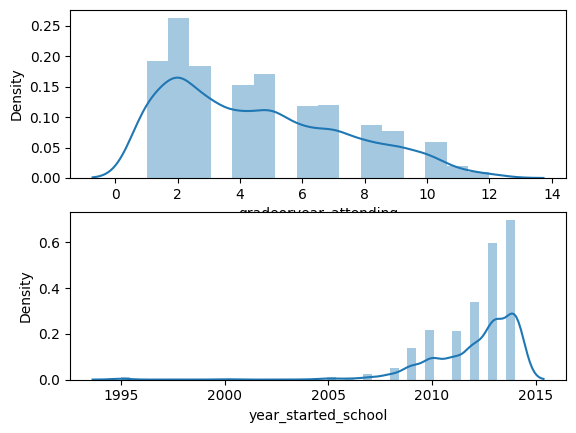

In [14]:
# plot pdf for gradeoryear_attending and year_started_school


"""this plot is made by running the cell that is causing the problem in f1 score"""

fig, ax = plt.subplots(2,1)
sns.distplot(X_train['gradeoryear_attending'], ax=ax[0])
sns.distplot(X_train['year_started_school'], ax=ax[1])
plt.show()


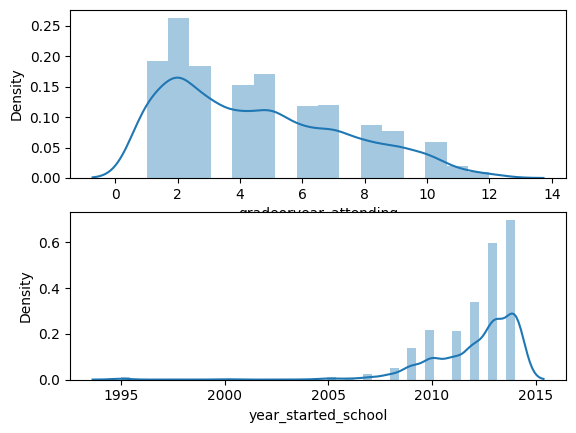

In [15]:
"""this plot is made by not running the cell that is causing the problem in f1 score"""""
fig, ax = plt.subplots(2,1)
sns.distplot(X_train['gradeoryear_attending'], ax=ax[0])
sns.distplot(X_train['year_started_school'], ax=ax[1])
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_train = pd.Series(y_train)

y_test = le.transform(y_test)
y_test = pd.Series(y_test)

num_df['studies_now'] = le.transform(num_df['studies_now'])

In [17]:
#drop notstudying_reason and frequented_school_12 from X_train 
X_train.drop(['notstudying_reason', 'frequented_school_12','mean_cal'], axis=1, inplace=True)
X_train['food_pc_nom'] = X_train['food_pc_nom'] + 0.0001
X_test.drop(['notstudying_reason', 'frequented_school_12','mean_cal'], axis=1, inplace=True)
X_test['food_pc_nom'] = X_test['food_pc_nom'] + 0.0001

num_df.drop(['notstudying_reason', 'frequented_school_12','mean_cal'], axis=1, inplace=True)
num_df['food_pc_nom'] = num_df['food_pc_nom'] + 0.0001

In [18]:
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

In [19]:
#create a dataframe named correlation which is X_Train+Y_Train
correlation = X_train[numerical_cols].copy()
correlation['studies_now'] = y_train
#check correlation of all variables with studies_now
correlation.corr()['studies_now'].sort_values(ascending=False)
#create a correlation matrix
corr_matrix = correlation.corr()
corr_matrix

,food_pc_nom,nf_pc_nom,age,gradeoryear_attending,year_started_school,time_facitlity_d,studies_now
food_pc_nom,1.000000,0.320010,0.075704,0.166527,0.042559,-0.055551,-0.015110
nf_pc_nom,0.320010,1.000000,0.056733,0.130516,0.051965,-0.045031,0.012585
age,0.075704,0.056733,1.000000,0.814235,-0.141736,-0.016733,0.047516
gradeoryear_attending,0.166527,0.130516,0.814235,1.000000,-0.085673,-0.043010,0.074667
year_started_school,0.042559,0.051965,-0.141736,-0.085673,1.000000,-0.036524,-0.046634
time_facitlity_d,-0.055551,-0.045031,-0.016733,-0.043010,-0.036524,1.000000,-0.026308
studies_now,-0.015110,0.012585,0.047516,0.074667,-0.046634,-0.026308,1.000000


In [20]:
correlation.corr()['studies_now'].sort_values(ascending=False)

studies_now              1.000000
gradeoryear_attending    0.074667
age                      0.047516
nf_pc_nom                0.012585
food_pc_nom             -0.015110
time_facitlity_d        -0.026308
year_started_school     -0.046634
Name: studies_now, dtype: float64

In [21]:
numerical_cols

['food_pc_nom',
 'nf_pc_nom',
 'age',
 'gradeoryear_attending',
 'year_started_school',
 'time_facitlity_d']

In [22]:
X_train[categorical_cols].isnull().mean()*100

#create list of numerical columns with missing values with following conditions 0 < missing values < 5, 5 < missing values < 30, missing values > 30
cat_cols_missing_0_5 = [col for col in categorical_cols if X_train[col].isnull().mean() > 0 and X_train[col].isnull().mean() < 0.1]
cat_cols_missing_5_30 = [col for col in categorical_cols if X_train[col].isnull().mean() > 0.1 and X_train[col].isnull().mean() < 0.3]
cat_cols_missing_30_50 = [col for col in categorical_cols if X_train[col].isnull().mean() > 0.3 and X_train[col].isnull().mean() < 0.5]
cat_cols_missing_50 = [col for col in categorical_cols if X_train[col].isnull().mean() > 0.5]
#pritn the list
print(cat_cols_missing_0_5)
print(cat_cols_missing_5_30)
print(cat_cols_missing_30_50)
print(cat_cols_missing_50)


['read_write']
['grade_or_year', 'education_level_attending', 'sanitation_type']
['school_problem_a', 'school_problem_b', 'school_problem_c', 'school_problem_d', 'school_problem_e', 'school_problem_f']
['marital_status', 'occupation', 'worker_type', 'sector']


In [23]:
#replicate the same for numerical columns
num_cols_missing_0_5 = [col for col in numerical_cols if X_train[col].isnull().mean() > 0 and X_train[col].isnull().mean() < 0.1]
num_cols_missing_5_30 = [col for col in numerical_cols if X_train[col].isnull().mean() > 0.1 and X_train[col].isnull().mean() < 0.3]
num_cols_missing_30_50 = [col for col in numerical_cols if X_train[col].isnull().mean() > 0.3 and X_train[col].isnull().mean() < 0.5]
num_cols_missing_50 = [col for col in numerical_cols if X_train[col].isnull().mean() > 0.5]
#pritn the list
print(num_cols_missing_0_5)
print(num_cols_missing_5_30)
print(num_cols_missing_30_50)
print(num_cols_missing_50)


[]
['gradeoryear_attending', 'year_started_school']
[]
[]


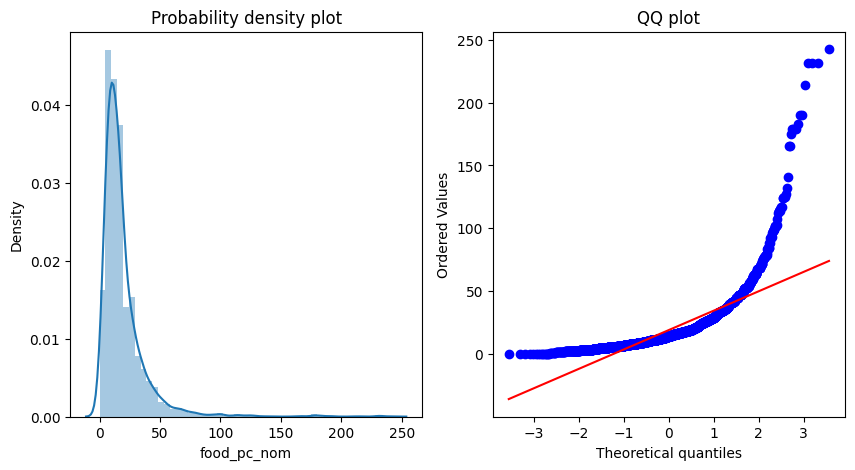

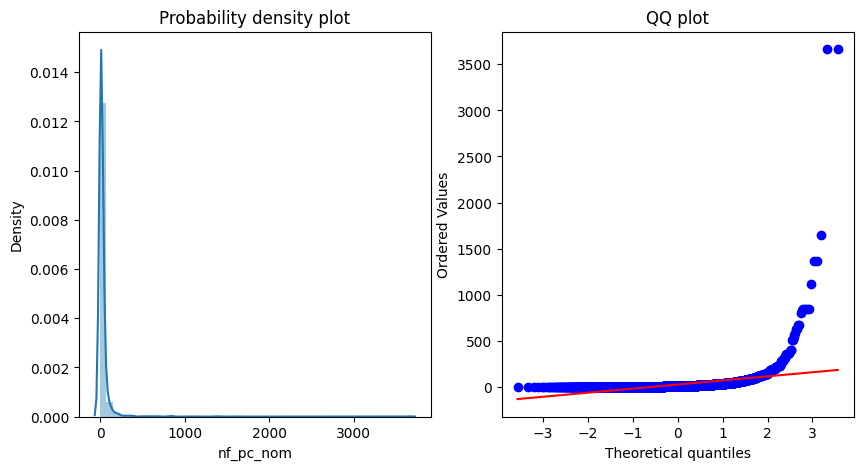

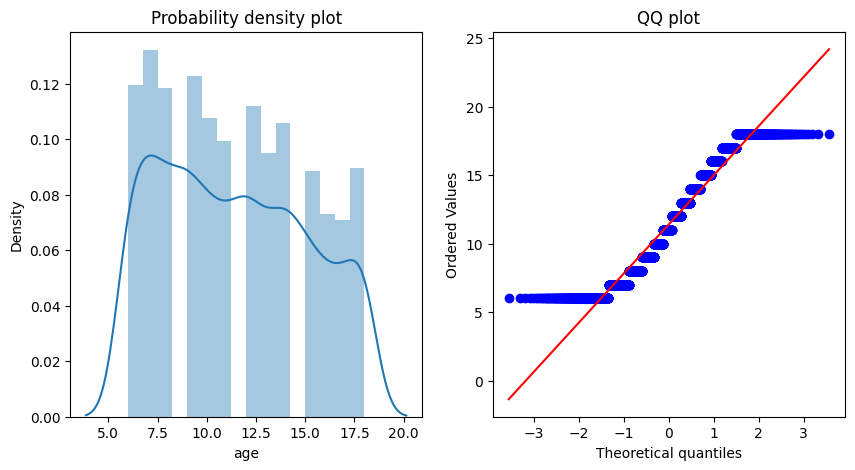

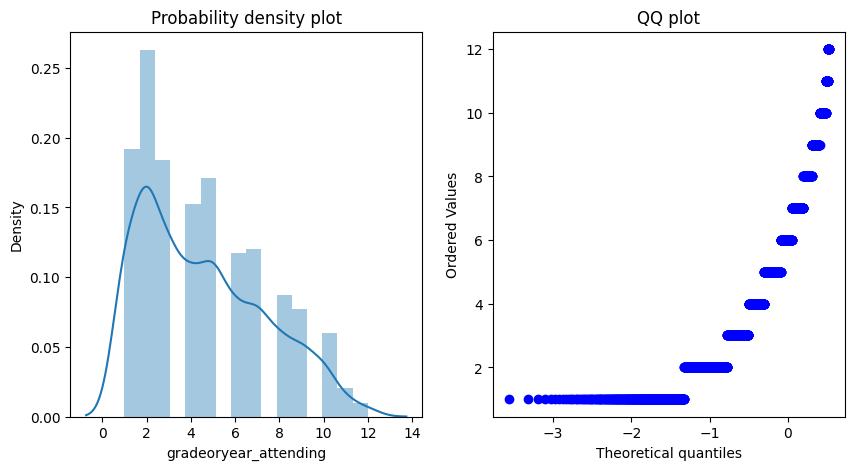

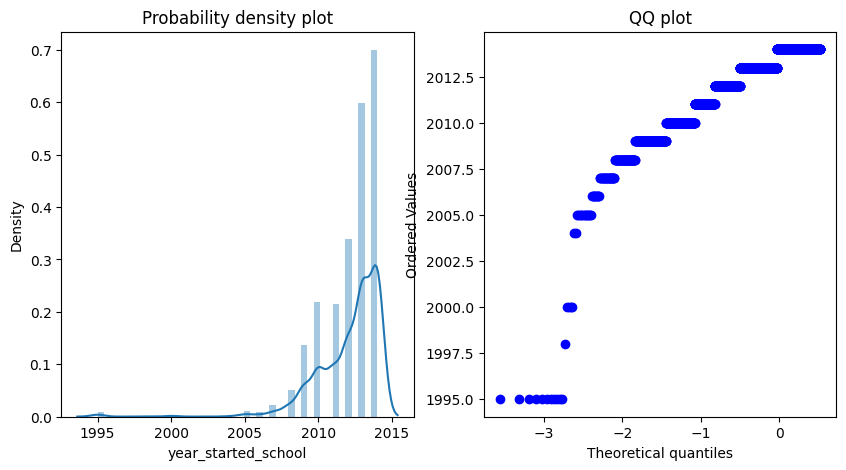

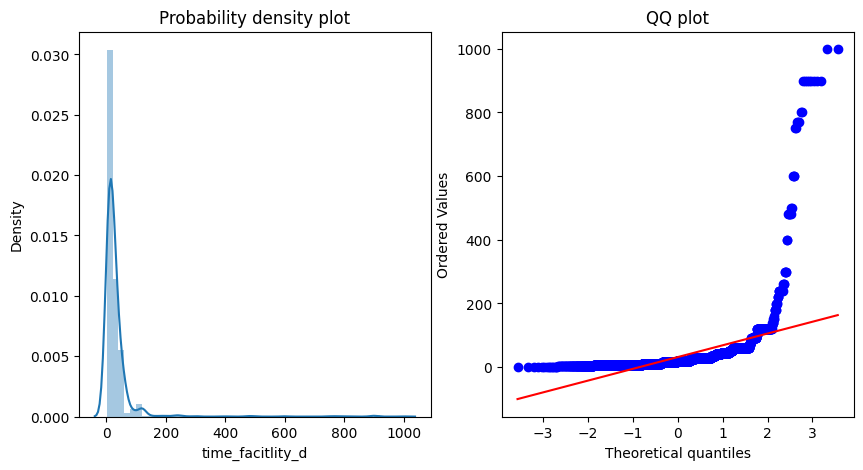

In [24]:
#target variable = 'studies_now'
# create a qq plot and probaility density plot for each numerical column

for col in numerical_cols:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(X_train[col], ax=ax[0])
    ax[0].set_title('Probability density plot')
    stats.probplot(X_train[col], plot=ax[1])
    ax[1].set_title('QQ plot')
    plt.show()



In [25]:

pt_2_apply_cols = ['age','gradeoryear_attending']
right_skew = ['food_pc_nom','nf_pc_nom','time_facitlity_d']
left_skew = ['year_started_school']




In [26]:
X_train_new = X_train[numerical_cols].copy()
X_test_new = X_test[numerical_cols].copy()

num_df_new = num_df[numerical_cols].copy()


In [27]:
X_train_new.isnull().mean()*100

food_pc_nom               0.00000
nf_pc_nom                 0.00000
age                       0.00000
gradeoryear_attending    29.97887
year_started_school      29.97887
time_facitlity_d          0.00000
dtype: float64

In [28]:
X_train_new.shape, X_test_new.shape, y_train.shape, y_test.shape, num_df_new.shape

((3786, 6), (947, 6), (3786,), (947,), (4733, 6))

In [29]:
# combine all the steps in a function that takes in strategy and apply on X_train and X_test and gives  classification report
def impute_and_fit(strategy,X_train_new, X_test_new):
    imputer = SimpleImputer(strategy=strategy,add_indicator=True)
    imputer.fit(X_train_new)
    X_train_new_transformed = imputer.transform(X_train_new)

    X_train_new_transformed_graph = pd.DataFrame(X_train_new_transformed, columns=numerical_cols+['gradeoryear_attending_nan','year_started_school_nan'])
    X_test_new_transformed = imputer.transform(X_test_new)
    X_test_new_transformed_graph = pd.DataFrame(X_test_new_transformed, columns=numerical_cols+['gradeoryear_attending_nan','year_started_school_nan'])
    for i in X_train_new.columns:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        X_train_new[i].plot(kind='kde', ax=ax)
        X_train_new_transformed_graph[i].plot(kind='kde', ax=ax, color='red')
        lines, labels = ax.get_legend_handles_labels()
        ax.legend(lines, labels, loc='best')
        plt.show()
    logreg = LogisticRegression()
    logreg.fit(X_train_new_transformed, y_train)
    y_pred = logreg.predict(X_test_new_transformed)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

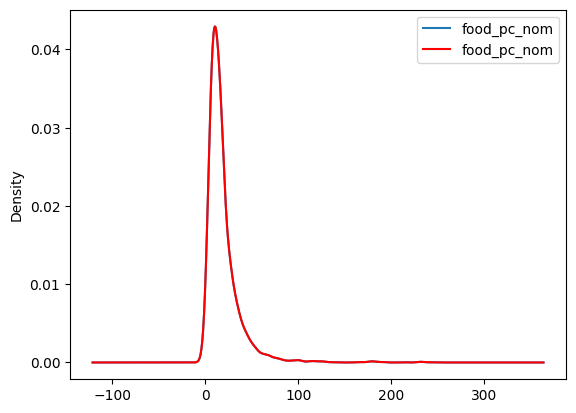

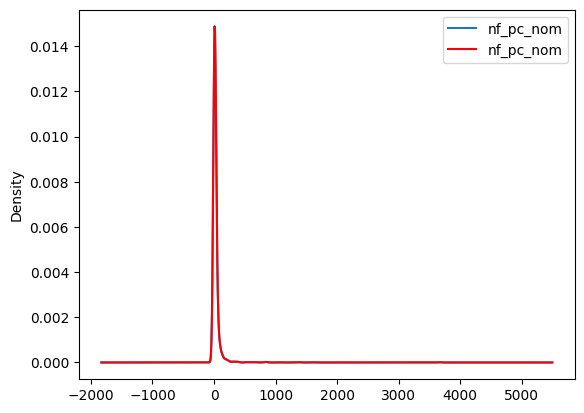

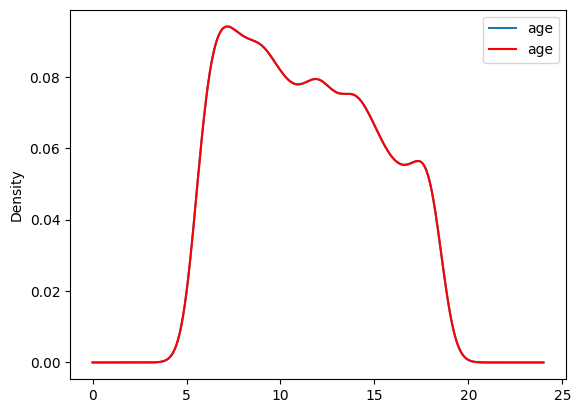

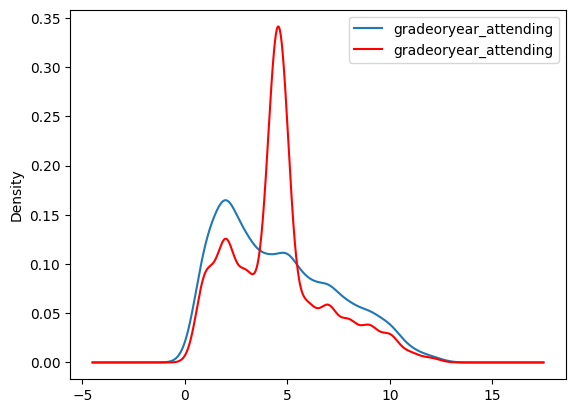

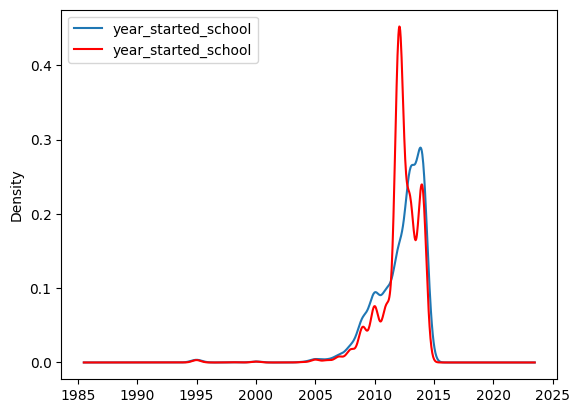

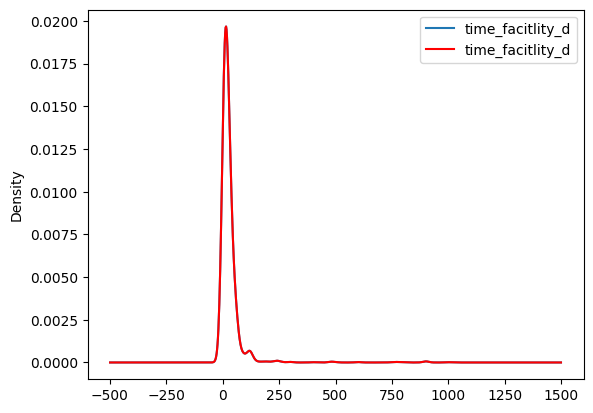

Accuracy: 0.7750791974656811
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.38      0.43       117
           1       0.80      0.95      0.87       658
           2       0.88      0.38      0.53       172

    accuracy                           0.78       947
   macro avg       0.72      0.57      0.61       947
weighted avg       0.78      0.78      0.75       947



In [30]:
impute_and_fit('mean',X_train_new, X_test_new)

In [31]:
X_train_new = X_train[numerical_cols].copy()
X_test_new = X_test[numerical_cols].copy()
num_df_new = num_df[numerical_cols].copy()
X_train_new.shape, X_test_new.shape, num_df_new.shape

((3786, 6), (947, 6), (4733, 6))

In [32]:
X_train_new

,food_pc_nom,nf_pc_nom,age,gradeoryear_attending,year_started_school,time_facitlity_d
2893,4.329862,5.479681,13,NaN,NaN,120.0
5103,8.972023,6.726540,8,2.0,2013.0,40.0
1453,36.228669,31.714245,6,NaN,NaN,35.0
8058,25.819571,28.593233,16,NaN,NaN,5.0
4799,8.758779,4.721361,7,1.0,2014.0,40.0
...,...,...,...,...,...,...
2779,6.500100,4.847872,10,NaN,NaN,5.0
8847,15.636918,7.224942,10,3.0,2012.0,20.0
4455,6.185814,10.894603,9,3.0,2012.0,15.0
7096,24.559028,17.941195,8,2.0,2013.0,15.0


In [33]:
# create another simple imputer with median
si_2 = SimpleImputer(strategy='median',add_indicator=True)
ss = StandardScaler()
yjt = PowerTransformer(method='yeo-johnson',standardize=False)
lr = LogisticRegression()


In [34]:
# use knn imputer
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5,add_indicator=True)




In [35]:
X_train_new = si_2.fit_transform(X_train_new)
X_test_new = si_2.transform(X_test_new)
num_df_new = si_2.transform(num_df_new)

X_train_new = ss.fit_transform(X_train_new)
X_test_new = ss.transform(X_test_new)


X_train_new = yjt.fit_transform(X_train_new)
X_test_new = yjt.transform(X_test_new)




In [36]:
X_train_new_Df = pd.DataFrame(X_train_new, columns=numerical_cols+['gradeoryear_attending_nan','year_started_school_nan'])
X_test_new_Df = pd.DataFrame(X_test_new, columns=numerical_cols+['gradeoryear_attending_nan','year_started_school_nan'])
num_df_new_Df = pd.DataFrame(num_df_new, columns=numerical_cols+['gradeoryear_attending_nan','year_started_school_nan'])

In [37]:
num_df_new_Df

,food_pc_nom,nf_pc_nom,age,gradeoryear_attending,year_started_school,time_facitlity_d,gradeoryear_attending_nan,year_started_school_nan
0,2.577740,4.029116,10.0,4.0,2013.0,5.0,1.0,1.0
1,2.577740,4.029116,12.0,4.0,2013.0,5.0,1.0,1.0
2,9.047719,36.496220,7.0,3.0,2011.0,20.0,0.0,0.0
3,9.047719,36.496220,15.0,5.0,2009.0,20.0,0.0,0.0
4,9.047719,36.496220,18.0,11.0,2014.0,20.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4728,25.561324,173.604721,11.0,6.0,2014.0,5.0,0.0,0.0
4729,25.561324,173.604721,11.0,6.0,2014.0,5.0,0.0,0.0
4730,48.095334,247.437027,18.0,10.0,2012.0,10.0,0.0,0.0
4731,24.928672,108.062332,6.0,1.0,2014.0,6.0,0.0,0.0


In [38]:
num_df_new_Df.to_csv('num_df.csv', index=False)

In [39]:
#apply sfs on X_train_new and y_train
sfs = SFS(lr, 
          k_features='best', 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=5,n_jobs=-1)
model_sfs = sfs.fit(X_train_new_Df, y_train)
#scoring should be f1 score


In [40]:
#get best score in model_sfs
model_sfs.k_score_

0.9294744216686475

In [41]:
model_sfs.k_feature_names_

('age', 'gradeoryear_attending_nan')

In [42]:
X_train_new=model_sfs.transform(X_train_new)
X_test_new=model_sfs.transform(X_test_new)

In [43]:
X_train_new_Df=model_sfs.transform(X_train_new_Df)
X_test_new_Df=model_sfs.transform(X_test_new_Df)


In [44]:
X_train_new_Df = pd.DataFrame(X_train_new_Df, columns = model_sfs.k_feature_names_)
X_test_new_Df = pd.DataFrame(X_test_new_Df, columns = model_sfs.k_feature_names_)

In [45]:
lr.fit(X_train_new, y_train)

LogisticRegression()

In [46]:
y_pred=lr.predict(X_test_new)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

Accuracy: 0.9292502639915523
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       117
           1       1.00      1.00      1.00       658
           2       0.80      0.81      0.81       172

    accuracy                           0.93       947
   macro avg       0.84      0.84      0.84       947
weighted avg       0.93      0.93      0.93       947



In [47]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_test_new, y_test, cv=5)
print(scores.mean())

0.9292341966026176


In [48]:
from shapash.explainer.smart_explainer import SmartExplainer


In [49]:
xpl = SmartExplainer(model=lr)

In [50]:
xpl.compile(x=X_test_new_Df,y_target=y_test,y_pred=pd.Series(y_pred))

INFO: Shap explainer type - <shap.explainers._exact.ExactExplainer object at 0x000001EEA7E3DA50>


ExactExplainer explainer: 948it [00:16, 54.44it/s]                          


In [51]:
app = xpl.run_app(title_story='SmartExplainer')

INFO:root:Your Shapash application run on http://LAPTOP-DON0H7P7:8050/
INFO:root:Use the method .kill() to down your app.


In [ ]:
X_train_new_Df['y_train'] = y_train
X_train_new_Df.corr()['y_train'].sort_values(ascending=False)


#create a correlation matrix and display all rows and columns
corr_matrix = X_train_new_Df.corr()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#display correlation with y_train
corr_matrix['y_train'].sort_values(ascending=True)

age                         -0.352908
gradeoryear_attending_nan    0.168370
y_train                      1.000000
Name: y_train, dtype: float64

ERROR:werkzeug:172.23.17.64 - - [18/Jan/2024 09:55:16] code 400, message Bad request version ('@ñ\x00®Ñ³K!1Èµðùü¤}\x8f¤_baÄgu\x88äÉ\x82cw¥4É\x08fÕSí§d{\x8a¼ÊäÇ\x18N\x99Êk\x9cOe*Êx\x8aÁõlG²Lk7¹üÚh\x8f\x7fäÒ³Y\xad\x92âúdY@Þi¾Fô©\x00\x05\x00\x05\x01\x00\x00\x00\x00\x00')
ERROR:werkzeug:172.23.17.64 - - [18/Jan/2024 09:55:16] code 400, message Bad request version ('zz\x13\x01\x13\x02\x13\x03À+À/À,À0Ì©Ì¨À\x13À\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x01\x93êê\x00\x00\x00\x05\x00\x05\x01\x00\x00\x00\x00\x00')
Exception in thread Thread-6 (<lambda>):
Traceback (most recent call last):
  File "c:\Users\Sanjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connection.py", line 203, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sanjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "c:\Users\Sanjay\AppData\Local\Programs\Pyth